<xarray.Dataset> Size: 4kB
Dimensions:  (mixer: 2, time: 100)
Coordinates:
  * mixer    (mixer) <U1 8B 'I' 'Q'
  * time     (time) int32 400B 16 816 1616 2416 3216 ... 76816 77616 78416 79216
Data variables:
    q0_ro    (mixer, time) float64 2kB ...
    q1_ro    (mixer, time) float64 2kB ...
q0_ro
Parameters([('amp', <Parameter 'amp', value=1.0389821499160029e-06 +/- 2.35e-06, bounds=[-inf:inf]>), ('tau', <Parameter 'tau', value=79.21599999974441 +/- 0.388, bounds=[0:79.216]>), ('offset', <Parameter 'offset', value=-2.466692288172201e-05 +/- 2.54e-06, bounds=[-1.0:1.0]>)])
q1_ro
Parameters([('amp', <Parameter 'amp', value=2.4796321898193706e-05 +/- 5.31e-07, bounds=[-inf:inf]>), ('tau', <Parameter 'tau', value=14.879519261478018 +/- 0.671, bounds=[0:79.216]>), ('offset', <Parameter 'offset', value=-5.615635157552035e-06 +/- 2.2e-07, bounds=[-1.0:1.0]>)])


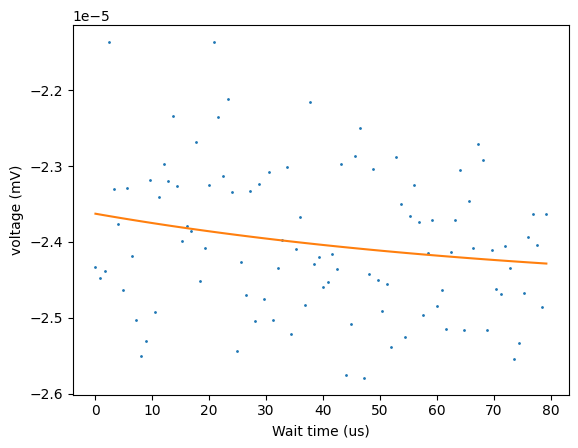

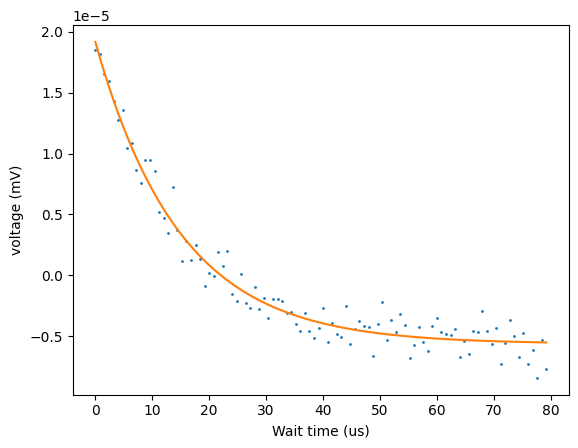

In [1]:


# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os

#dataset = xr.open_dataset(r"d:\Data\5Q4C0510_DR1_scalinQ\20240614_1608_q4_xy_T1.nc")
dataset = xr.open_dataset(r"C:\Users\arthu\20240723_1051_q1_xy_T1.nc")

print(dataset)

time = (dataset.coords["time"].values)/1000

from qcat.visualization.qubit_relaxation import plot_qubit_relaxation
from qcat.analysis.qubit.relaxation import qubit_relaxation_fitting

for ro_name, data in dataset.data_vars.items():
    print(ro_name)
    fit_result = qubit_relaxation_fitting(time, data.values[0])
    print(fit_result.params)
    fig, ax = plt.subplots()
    plot_qubit_relaxation(time, data[0], ax, fit_result)

T1 Histogram

In [3]:
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os

dataset = xr.open_dataset(r"d:\Data\5Q4C0510_DR1_scalinQ\20240614_1608_q4_xy_T1.nc")
print(dataset)

time = (dataset.coords["time"].values)/1000

from qcat.visualization.qubit_relaxation import plot_time_dep_qubit_T1_relaxation_2Dmap, plot_qubit_T1_relaxation_hist
from qcat.analysis.qubit.relaxation import qubit_relaxation_fitting


rep = dataset.coords["repetition"].values
dataset.data_vars.items()
single_name = "q4_ro"
for ro_name, data in [(single_name, dataset["q4_ro"])]:
    acc_T1 = []
    for i in range(rep.shape[-1]):
        fit_result = qubit_relaxation_fitting(time, data.values[0][i])
        acc_T1.append(fit_result.params["tau"].value)
    fig, ax = plt.subplots()
    plot_time_dep_qubit_T1_relaxation_2Dmap( rep, time, data.values[0], ax, fit_result=acc_T1)
    print(acc_T1)
    fig1, ax1 = plt.subplots()

    plot_qubit_T1_relaxation_hist( np.array(acc_T1), ax1 )



<xarray.Dataset> Size: 4kB
Dimensions:  (mixer: 2, time: 100)
Coordinates:
  * mixer    (mixer) <U1 8B 'I' 'Q'
  * time     (time) int32 400B 16 816 1616 2416 3216 ... 76816 77616 78416 79216
Data variables:
    q0_ro    (mixer, time) float64 2kB ...
    q1_ro    (mixer, time) float64 2kB ...


ImportError: cannot import name 'plot_time_dep_qubit_relaxation_2Dmap' from 'qcat.visualization.qubit_relaxation' (c:\users\arthu\onedrive\documents\github\qcat\src\qcat\visualization\qubit_relaxation.py)